In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
from keras.utils.data_utils import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 6 tane imaj 
# random seçicez
# göstermesi

for i in range(0,6):

  rand_num = random.randint(0,len(x_train))
  img = x_train[rand_num]
  cv2_imshow(img)


In [ ]:
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[1]

In [ ]:
x_train=x_train.reshape(len(x_train),img_rows,img_cols,1)
x_test=x_test.reshape(len(x_test),img_rows,img_cols,1)

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
num_classes = y_test.shape[1]

In [ ]:
num_classes

10

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",
              metrics=["accuracy"])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                        

In [ ]:
import time
batch_sizes=[32,64,128,256,512,1024]
epochs = 10
time_list=list()
acc_score = list()
history_list=list()
start_time1=time.time()
history1 = model.fit(x_train, y_train, batch_size=batch_sizes[0],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score1= model.evaluate(x_test,y_test)
time1 = round(time.time()-start_time1)
print("test loss for batch size ",batch_sizes[0]," :",score1[0])
print("test accuracy for batch size ",batch_sizes[0]," :",score1[1])
time_list.append(time1)
acc_score.append(score1[1])
history_list.append(history1)
print("Time for batch size ",batch_sizes[0]," :",time1)



Epoch 1/10
1875/1875 [==============================] - 19s 8ms/step - loss: 0.1200 - accuracy: 0.9628 - val_loss: 0.0468 - val_accuracy: 0.9845
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.0332 - val_accuracy: 0.9909
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0392 - accuracy: 0.9881 - val_loss: 0.0372 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0457 - val_accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0436 - val_accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0266 - accuracy: 0.9920 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.0367 - val_accur

In [ ]:
start_time2=time.time()
history2 = model.fit(x_train, y_train, batch_size=batch_sizes[1],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score2= model.evaluate(x_test,y_test)
time2 = round(time.time()-start_time2)
print("test loss for batch size ",batch_sizes[1]," :",score2[0])
print("test accuracy for batch size ",batch_sizes[1]," :",score2[1])
time_list.append(time2)
acc_score.append(score2[1])
history_list.append(history2)
print("Time for batch size ",batch_sizes[1]," :",time2)


Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0336 - val_accuracy: 0.9931
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0572 - val_accuracy: 0.9908
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.0485 - val_accuracy: 0.9904
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0544 - val_accuracy: 0.9908
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.0438 - val_accuracy: 0.9925
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.0547 - val_accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.0689 - val_accuracy: 0.9902
Epoch 

In [ ]:
start_time3=time.time()
history3 = model.fit(x_train, y_train, batch_size=batch_sizes[2],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score3= model.evaluate(x_test,y_test)
time3= round(time.time()-start_time3)
print("test loss for batch size ",batch_sizes[2]," :",score3[0])
print("test accuracy for batch size ",batch_sizes[2]," :",score3[1])
time_list.append(time3)
acc_score.append(score3[1])
history_list.append(history3)
print("Time for batch size ",batch_sizes[2]," :",time3)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0401 - val_accuracy: 0.9931
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0435 - val_accuracy: 0.9936
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 7.9724e-04 - accuracy: 0.9997 - val_loss: 0.0430 - val_accuracy: 0.9935
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0578 - val_accuracy: 0.9934
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0774 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.0595 - val_accuracy: 0.9923
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.0628 - val_accuracy: 0.

In [ ]:
start_time4=time.time()
history4 = model.fit(x_train, y_train, batch_size=batch_sizes[3],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score4= model.evaluate(x_test,y_test)
time4 = round(time.time()-start_time4)
print("test loss for batch size ",batch_sizes[3]," :",score4[0])
print("test accuracy for batch size ",batch_sizes[3]," :",score4[1])
time_list.append(time4)
acc_score.append(score4[1])
history_list.append(history4)
print("Time for batch size ",batch_sizes[3]," :",time4)

Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0716 - val_accuracy: 0.9923
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 4.7965e-04 - accuracy: 0.9999 - val_loss: 0.0812 - val_accuracy: 0.9924
Epoch 3/10
235/235 [==============================] - 5s 19ms/step - loss: 5.3177e-04 - accuracy: 0.9998 - val_loss: 0.0695 - val_accuracy: 0.9941
Epoch 4/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0676 - val_accuracy: 0.9935
Epoch 5/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0729 - val_accuracy: 0.9932
Epoch 6/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0788 - val_accuracy: 0.9929
Epoch 7/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0678 - val_accuracy

In [ ]:
start_time5=time.time()
history5 = model.fit(x_train, y_train, batch_size=batch_sizes[4],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score5= model.evaluate(x_test,y_test)
time5 = round(time.time()-start_time5)
print("test loss for batch size ",batch_sizes[4]," :",score5[0])
print("test accuracy for batch size ",batch_sizes[4]," :",score5[1])
time_list.append(time5)
acc_score.append(score5[1])
history_list.append(history5)
print("Time for batch size ",batch_sizes[4]," :",time5)

Epoch 1/10
118/118 [==============================] - 5s 35ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0799 - val_accuracy: 0.9935
Epoch 2/10
118/118 [==============================] - 4s 33ms/step - loss: 8.5896e-04 - accuracy: 0.9998 - val_loss: 0.0809 - val_accuracy: 0.9936
Epoch 3/10
118/118 [==============================] - 4s 33ms/step - loss: 2.4708e-04 - accuracy: 0.9999 - val_loss: 0.0827 - val_accuracy: 0.9933
Epoch 4/10
118/118 [==============================] - 4s 33ms/step - loss: 9.3367e-05 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9938
Epoch 5/10
118/118 [==============================] - 4s 34ms/step - loss: 2.1793e-04 - accuracy: 0.9999 - val_loss: 0.0868 - val_accuracy: 0.9930
Epoch 6/10
118/118 [==============================] - 4s 34ms/step - loss: 1.6622e-04 - accuracy: 0.9999 - val_loss: 0.0916 - val_accuracy: 0.9925
Epoch 7/10
118/118 [==============================] - 4s 34ms/step - loss: 2.2896e-04 - accuracy: 0.9999 - val_loss: 0.089

In [ ]:
start_time6=time.time()
history6 = model.fit(x_train, y_train, batch_size=batch_sizes[5],epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score6= model.evaluate(x_test,y_test)
time6 = round(time.time()-start_time6)
print("test loss for batch size ",batch_sizes[5]," :",score6[0])
print("test accuracy for batch size ",batch_sizes[5]," :",score6[1])
time_list.append(time6)
acc_score.append(score6[1])
history_list.append(history6)
print("Time for batch size ",batch_sizes[5]," :",time6)

Epoch 1/10
59/59 [==============================] - 6s 85ms/step - loss: 2.0892e-04 - accuracy: 0.9999 - val_loss: 0.0874 - val_accuracy: 0.9924
Epoch 2/10
59/59 [==============================] - 4s 66ms/step - loss: 1.6193e-04 - accuracy: 0.9999 - val_loss: 0.0891 - val_accuracy: 0.9925
Epoch 3/10
59/59 [==============================] - 4s 67ms/step - loss: 1.0447e-05 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9923
Epoch 4/10
59/59 [==============================] - 4s 66ms/step - loss: 2.6820e-05 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.9927
Epoch 5/10
59/59 [==============================] - 4s 64ms/step - loss: 2.5189e-05 - accuracy: 1.0000 - val_loss: 0.0871 - val_accuracy: 0.9929
Epoch 6/10
59/59 [==============================] - 4s 64ms/step - loss: 7.5947e-05 - accuracy: 1.0000 - val_loss: 0.0861 - val_accuracy: 0.9933
Epoch 7/10
59/59 [==============================] - 4s 66ms/step - loss: 2.6488e-05 - accuracy: 1.0000 - val_loss: 0.0857 - val_ac

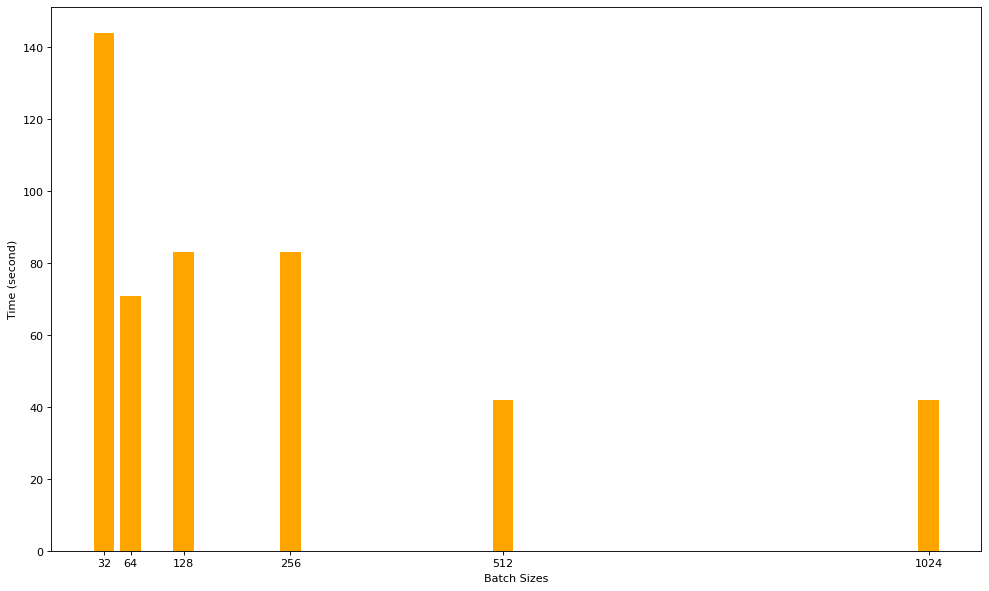

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9),dpi=80)
plt.bar(batch_sizes,time_list, width = 25, color="orange")
plt.xlabel("Batch Sizes")
plt.ylabel("Time (second)")
plt.xticks(batch_sizes)
plt.show()

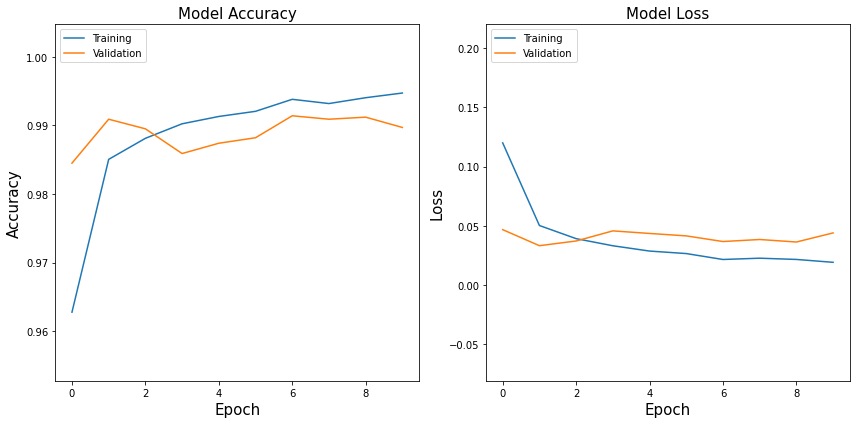

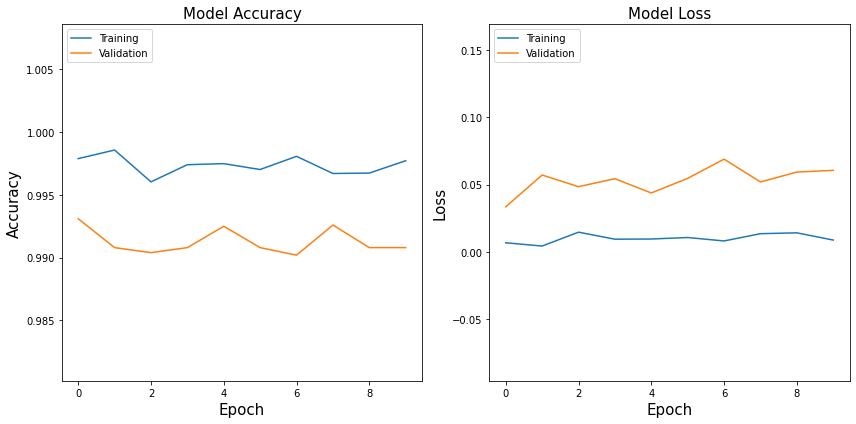

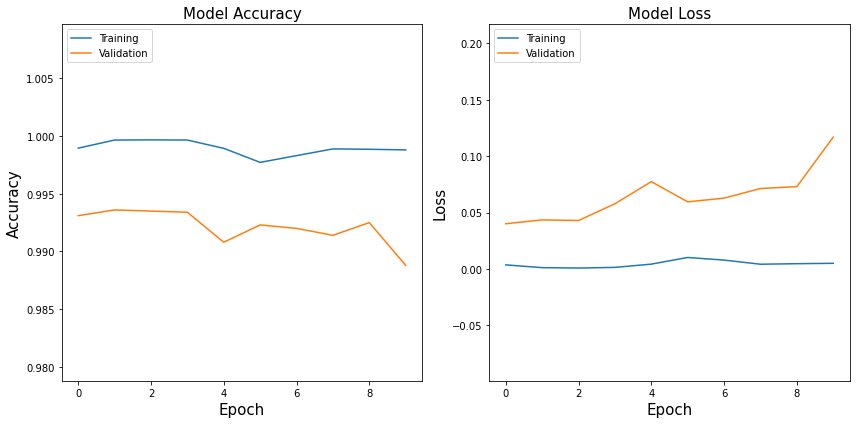

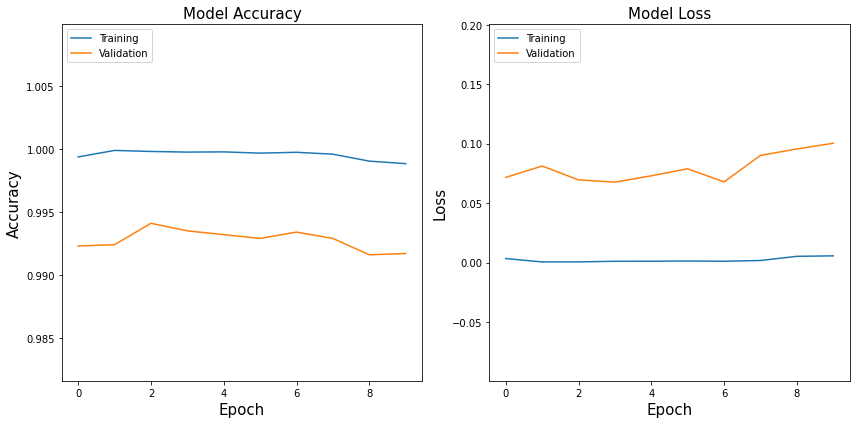

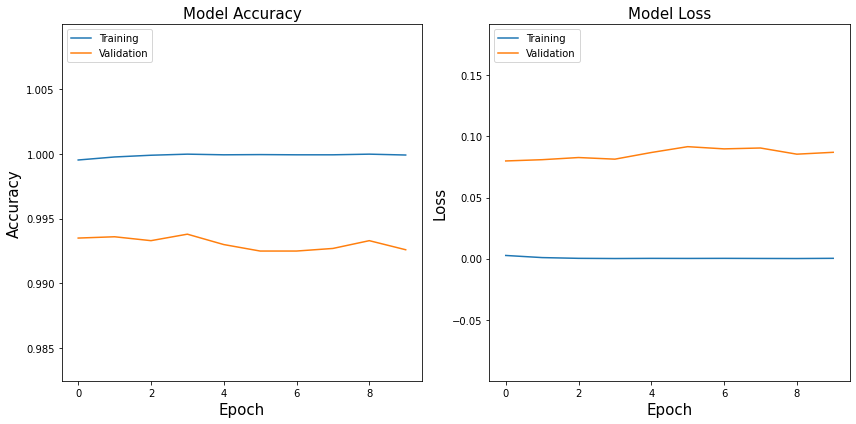

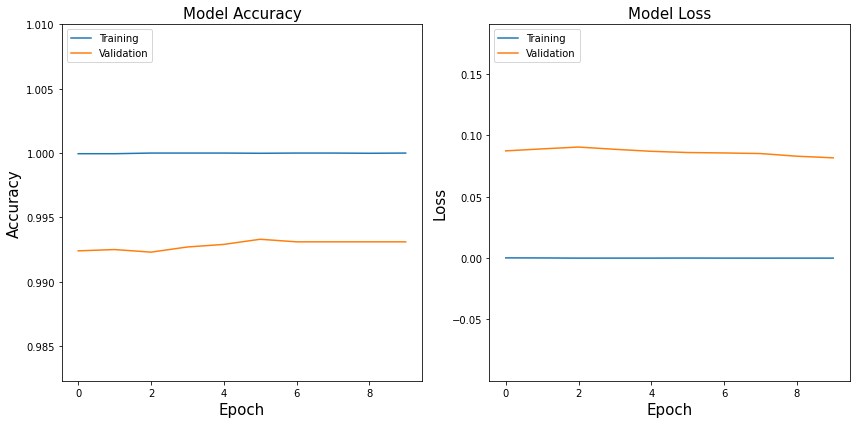

In [34]:
for i in range(6):
  xlabel = 'Epoch'
  legends = ['Training', 'Validation']

  ylim_pad = [0.01, 0.1]
  plt.figure(figsize=(12, 6))

  # Plot training & validation Accuracy values
  y1 = history_list[i].history['accuracy']
  y2 = history_list[i].history['val_accuracy']

  min_y = min(min(y1), min(y2))-ylim_pad[0]
  max_y = max(max(y1), max(y2))+ylim_pad[0]

  plt.subplot(121)
  plt.plot(y1)
  plt.plot(y2)
  plt.title('Model Accuracy', fontsize=15)
  plt.xlabel(xlabel, fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.ylim(min_y, max_y)
  plt.legend(legends, loc='upper left')
  plt.tight_layout()  
                          
  # Plot training & validation loss values
  y1 = history_list[i].history['loss']
  y2 = history_list[i].history['val_loss']

  min_y = min(min(y1), min(y2))-ylim_pad[1]
  max_y = max(max(y1), max(y2))+ylim_pad[1]
      
  plt.subplot(122)
  plt.plot(y1)
  plt.plot(y2)
  plt.title('Model Loss', fontsize=15)
  plt.xlabel(xlabel, fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.ylim(min_y, max_y)
  plt.legend(legends, loc='upper left')

  plt.tight_layout()                  
  plt.show()